# Importar bibliotecas necesarias

En esta sección, importaremos las bibliotecas esenciales para el análisis y modelado de datos: pandas, numpy, matplotlib, seaborn y scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Cargar y explorar el conjunto de datos Telco

A continuación, cargamos el archivo CSV del conjunto de datos Telco y exploramos sus primeras filas, tipos de datos y estadísticas descriptivas.

In [2]:
# Cambia la ruta al archivo CSV según corresponda
try:
	df = pd.read_csv('telco_customer_churn.csv')
except FileNotFoundError:
	print("Error: The file 'telco-customer-churn.csv' was not found.")
	# Provide an alternative action, e.g., load a default dataset or exit
	# For example:
	# df = pd.DataFrame()  # Create an empty DataFrame
	raise  # Re-raise the exception if you cannot proceed

# Mostrar las primeras filas
display(df.head())

# Mostrar tipos de datos
print(df.dtypes)

# Estadísticas descriptivas
display(df.describe(include='all'))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,TC-0000001,Male,0,No,No,59,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.00,1262.07,No
1,TC-0000002,Female,1,Yes,No,72,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,104.02,7235.23,Yes
2,TC-0000003,Female,0,Yes,Yes,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),28.75,137.94,No
3,TC-0000004,Female,0,No,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),43.20,1036.37,Yes
4,TC-0000005,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,31.65,1128.03,Yes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6888,2
top,TC-0000001,Male,NaN,Yes,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3624,NaN,3589,4962,NaN,6376,3615,3179,3955,...,3668,3918,3325,3297,3939,4186,2377,NaN,69,3717
mean,NaN,NaN,0.159875,NaN,NaN,18.738322,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.275513,NaN,NaN
std,NaN,NaN,0.366516,NaN,NaN,17.660791,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.805000,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.755000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.110000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.530000,NaN,NaN


# Limpieza y preprocesamiento de datos

En esta sección, limpiamos los valores nulos, convertimos variables categóricas y normalizamos los datos según sea necesario.

In [3]:
# Identificar valores nulos
print(df.isnull().sum())

# Eliminar filas o columnas con muchos nulos si es necesario
# df = df.dropna()  # Descomenta si deseas eliminar filas con nulos

# Ejemplo: Rellenar valores nulos en columnas numéricas con la mediana
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Convertir variables categóricas a tipo 'category'
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category')

# Codificar variables categóricas
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Normalizar variables numéricas
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Análisis exploratorio de datos (EDA)

Realizamos análisis estadísticos y examinamos correlaciones entre variables para entender mejor el conjunto de datos.

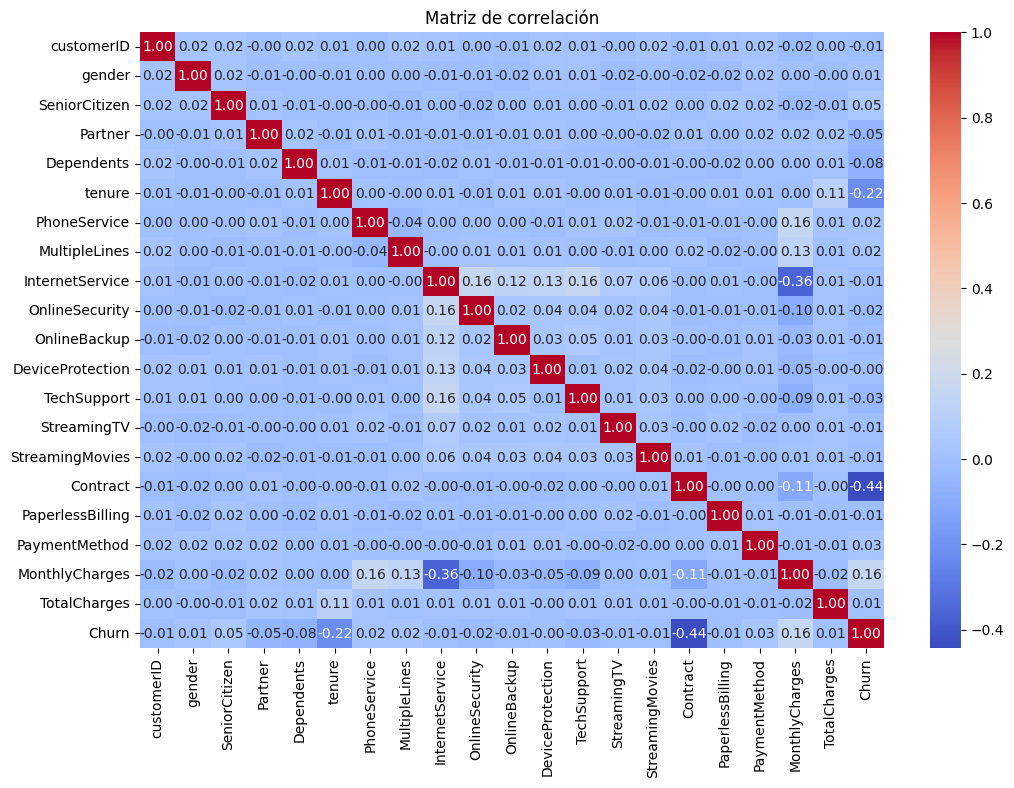

Churn
0    3717
1    3326
Name: count, dtype: int64
Churn
0    0.527758
1    0.472242
Name: proportion, dtype: float64


In [4]:
# Correlación entre variables
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Estadísticas de la variable objetivo (por ejemplo, 'Churn')
if 'Churn' in df.columns:
    print(df['Churn'].value_counts())
    print(df['Churn'].value_counts(normalize=True))

# Visualización de datos

Creamos gráficos de barras, histogramas y diagramas de dispersión para visualizar patrones y relaciones en los datos.

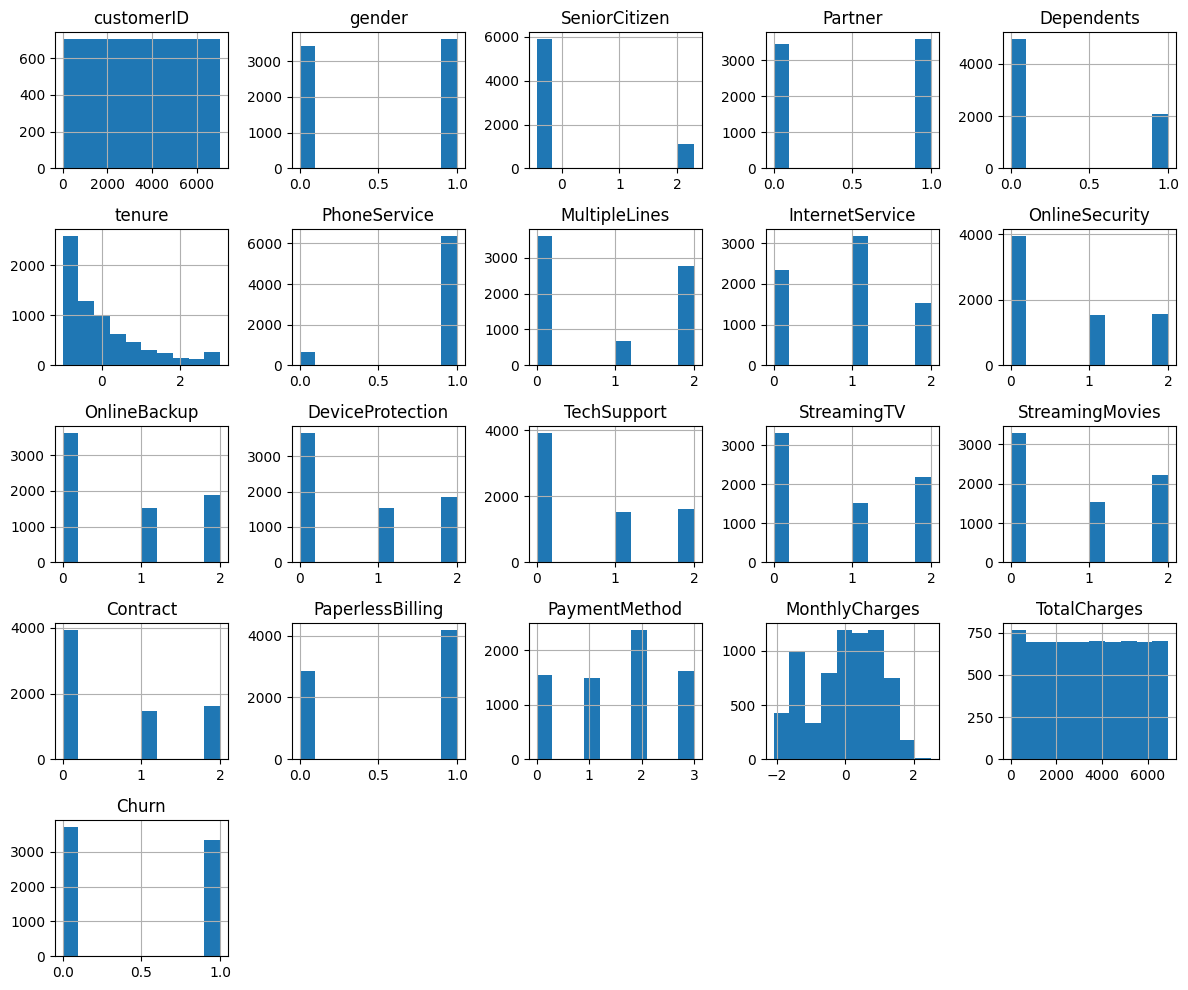

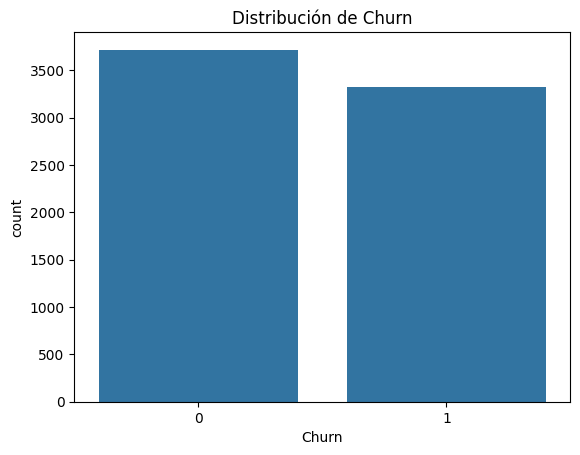

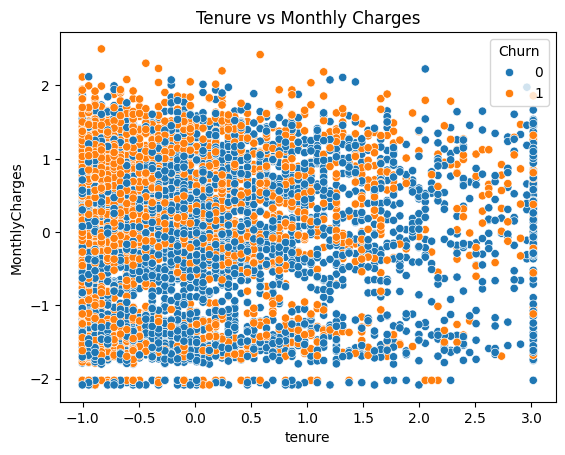

In [5]:
# Histograma de una variable numérica
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Gráfico de barras para la variable objetivo
if 'Churn' in df.columns:
    sns.countplot(x='Churn', data=df)
    plt.title('Distribución de Churn')
    plt.show()

# Diagrama de dispersión entre dos variables
if 'tenure' in df.columns and 'MonthlyCharges' in df.columns:
    sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
    plt.title('Tenure vs Monthly Charges')
    plt.show()

# Preparación de datos para modelado

Dividimos los datos en conjuntos de entrenamiento y prueba, y realizamos la codificación de variables si es necesario.

In [6]:
# Definir variables predictoras y objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Tamaño de entrenamiento: {X_train.shape}')
print(f'Tamaño de prueba: {X_test.shape}')

Tamaño de entrenamiento: (5634, 20)
Tamaño de prueba: (1409, 20)


# Entrenamiento de un modelo de clasificación

Entrenamos un modelo de clasificación, como un árbol de decisión o regresión logística, para predecir la variable objetivo.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Decision Tree
param_grid_dt = {'max_depth': [3, 5, 7, 10],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 3, 5]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
dt_model = grid_search_dt.best_estimator_

# Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10],
                   'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
                           param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
lr_model = grid_search_lr.best_estimator_

# Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                   'max_depth': [None, 5, 10],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 3, 5]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
rf_model = grid_search_rf.best_estimator_

# Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200],
                   'learning_rate': [0.01, 0.1, 0.2],
                   'max_depth': [3, 5, 7]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                           param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
gb_model = grid_search_gb.best_estimator_

# Evaluación del modelo

Evaluamos el desempeño de los modelos utilizando métricas como precisión, recall, F1-score y la matriz de confusión.

Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       744
           1       0.70      0.71      0.70       665

    accuracy                           0.72      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.72      0.72      0.72      1409

Matriz de confusión:
[[542 202]
 [194 471]]

Regresión Logística:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       744
           1       0.70      0.75      0.73       665

    accuracy                           0.73      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.73      0.73      0.73      1409

Matriz de confusión:
[[527 217]
 [163 502]]

Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       744
           1       0.71      0.71      0.71       665

    accuracy                         

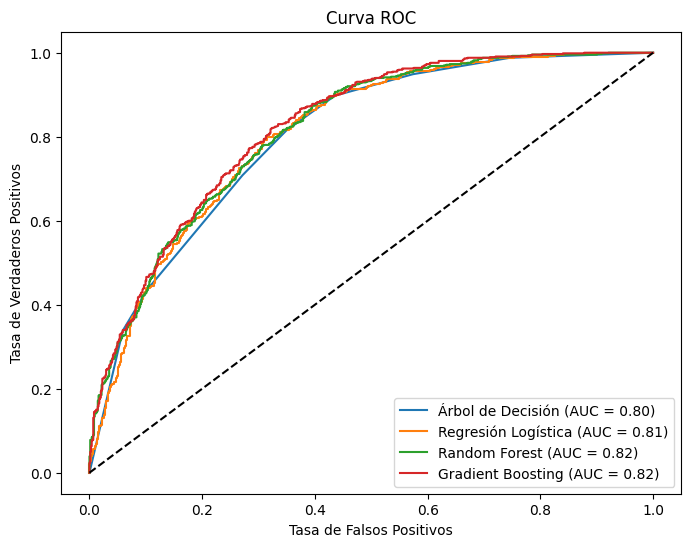

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predicciones
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluación árbol de decisión
print("Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt))

# Evaluación regresión logística
print("\nRegresión Logística:")
print(classification_report(y_test, y_pred_lr))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr))

# Evaluación Random Forest
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluación Gradient Boosting
print("\nGradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_gb))

# Calcular probabilidades para ROC AUC
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Calcular ROC AUC
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

print(f'ROC AUC Árbol de Decisión: {roc_auc_dt}')
print(f'ROC AUC Regresión Logística: {roc_auc_lr}')
print(f'ROC AUC Random Forest: {roc_auc_rf}')
print(f'ROC AUC Gradient Boosting: {roc_auc_gb}')

# Calcular la curva ROC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Árbol de Decisión (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Decisión del modelo

En este caso, con los resultados obtenidos el mejor método a utilizar será el Random Forest, ya que presenta la mejor puntuación en todas las métricas evaluadas, incluyendo la AUC-ROC.

In [9]:
# Identificar top 10 factores críticos usando la importancia de características del modelo Random Forest

importances = rf_model.feature_importances_
feature_names = X.columns
importancia_df = pd.DataFrame({
    'factor': feature_names,
    'importancia (%)': np.round(importances * 100, 2)
})
top_10_factores = importancia_df.nlargest(10, "importancia (%)")
display(top_10_factores)


,factor,importancia (%)
15,Contract,53.27
5,tenure,23.30
18,MonthlyCharges,9.35
19,TotalCharges,3.06
0,customerID,2.02
8,InternetService,1.41
17,PaymentMethod,1.20
4,Dependents,1.12
3,Partner,0.98
2,SeniorCitizen,0.79


Riesgo_Churn
Medio    3940
Bajo     1858
Alto     1245
Name: count, dtype: int64

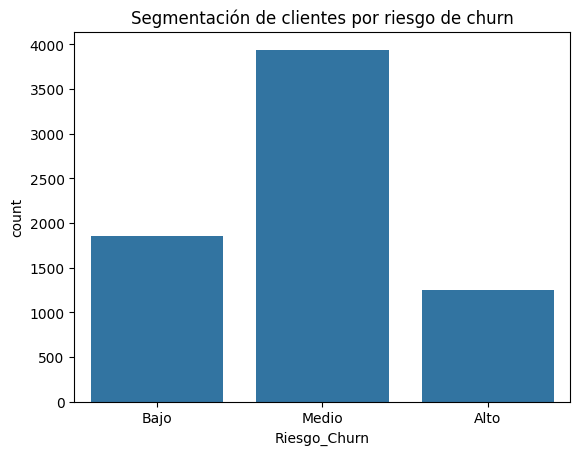

In [10]:
# Segmentación de clientes por riesgo usando el modelo Random Forest y los umbrales de probabilidad

# Definir segmentos de riesgo según la probabilidad de churn predicha
# Bajo riesgo: probabilidad < 0.33
# Riesgo medio: 0.33 <= probabilidad < 0.66
# Alto riesgo: probabilidad >= 0.66

# Calcular las probabilidades de churn para todos los clientes
prob_churn_rf = rf_model.predict_proba(X)[:, 1]

# Crear una nueva columna en el DataFrame original con la categoría de riesgo
df['Riesgo_Churn'] = pd.cut(
    prob_churn_rf,
    bins=[-np.inf, 0.33, 0.66, np.inf],
    labels=['Bajo', 'Medio', 'Alto']
)

# Mostrar la distribución de clientes por segmento de riesgo
display(df['Riesgo_Churn'].value_counts())
sns.countplot(x='Riesgo_Churn', data=df, order=['Bajo', 'Medio', 'Alto'])
plt.title('Segmentación de clientes por riesgo de churn')
plt.show()

/tmp/ipykernel_83984/3100383454.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comportamiento_df = df.groupby('Riesgo_Churn')[factores].mean().T.round(2)


Riesgo_Churn,Bajo,Medio,Alto
Contract,1.61,0.44,0.00
tenure,0.45,0.03,-0.78
MonthlyCharges,-0.30,-0.06,0.65
InternetService,0.89,0.95,0.67
PaymentMethod,1.56,1.58,1.58
Dependents,0.31,0.29,0.28
Partner,0.53,0.50,0.50
SeniorCitizen,-0.02,-0.00,0.04


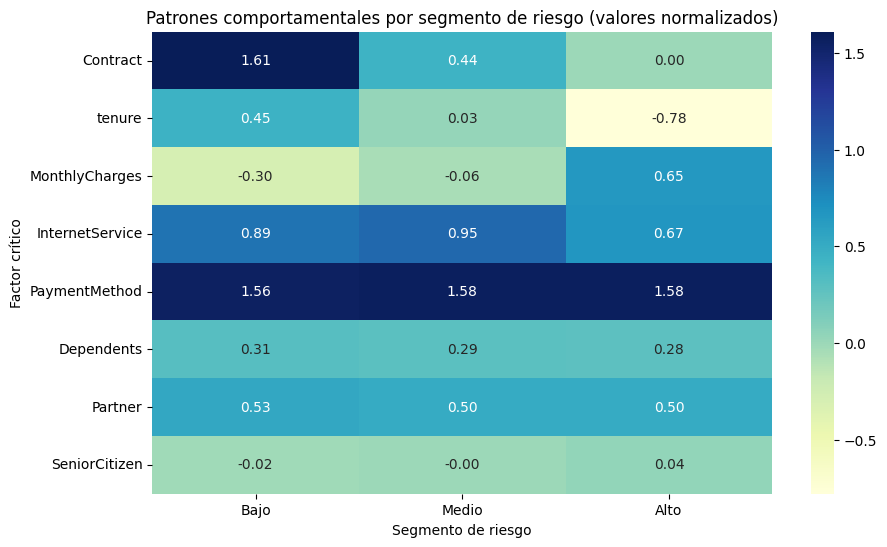

In [11]:
# Análisis de patrones comportamentales en los clientes

# Excluir columnas irrelevantes si aparecen en los factores
factores = [f for f in top_10_factores['factor'].tolist() if f not in ['customerID', 'TotalCharges']]

# Calcular la media de los factores críticos por segmento de riesgo (sin multiplicar por 100 si están normalizados)
comportamiento_df = df.groupby('Riesgo_Churn')[factores].mean().T.round(2)
display(comportamiento_df)

# Visualizar los patrones comportamentales
plt.figure(figsize=(10, 6))
sns.heatmap(comportamiento_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Patrones comportamentales por segmento de riesgo (valores normalizados)')
plt.ylabel('Factor crítico')
plt.xlabel('Segmento de riesgo')
plt.show()

/tmp/ipykernel_83984/2702350119.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  comportamiento_original_df = df_original.groupby('Riesgo_Churn')[factores_originales].mean().T.round(2)


Riesgo_Churn,Bajo,Medio,Alto
tenure,0.32,0.17,-0.12
MonthlyCharges,13.37,17.67,30.14
SeniorCitizen,83.67,84.19,85.46


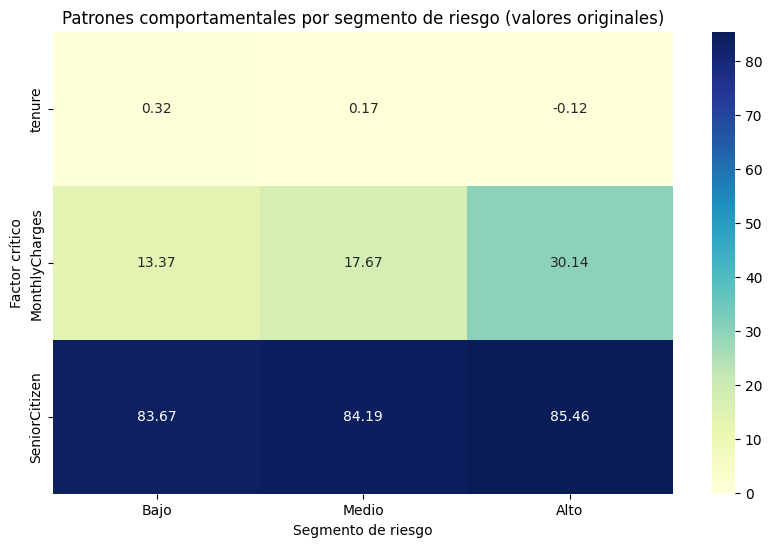

In [12]:
# Análisis de patrones comportamentales en valores originales (sin normalizar)

# Selecciona solo las columnas numéricas originales relevantes (excluyendo customerID)
factores_originales = [f for f in top_10_factores['factor'].tolist() if f not in ['customerID'] and f in num_cols]

# Revertir la normalización solo para las columnas seleccionadas
df_original = df.copy()
df_original[factores_originales] = scaler.inverse_transform(df[factores_originales])

# Calcular la media de los factores críticos por segmento de riesgo en valores originales
comportamiento_original_df = df_original.groupby('Riesgo_Churn')[factores_originales].mean().T.round(2)
display(comportamiento_original_df)

# Visualizar los patrones comportamentales en valores originales
plt.figure(figsize=(10, 6))
sns.heatmap(comportamiento_original_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Patrones comportamentales por segmento de riesgo (valores originales)')
plt.ylabel('Factor crítico')
plt.xlabel('Segmento de riesgo')
plt.show()

,factor,importancia (%)
15,Contract,53.27
5,tenure,23.30
18,MonthlyCharges,9.35
19,TotalCharges,3.06
0,customerID,2.02
8,InternetService,1.41
17,PaymentMethod,1.20
4,Dependents,1.12
3,Partner,0.98
2,SeniorCitizen,0.79


/tmp/ipykernel_83984/3981539866.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


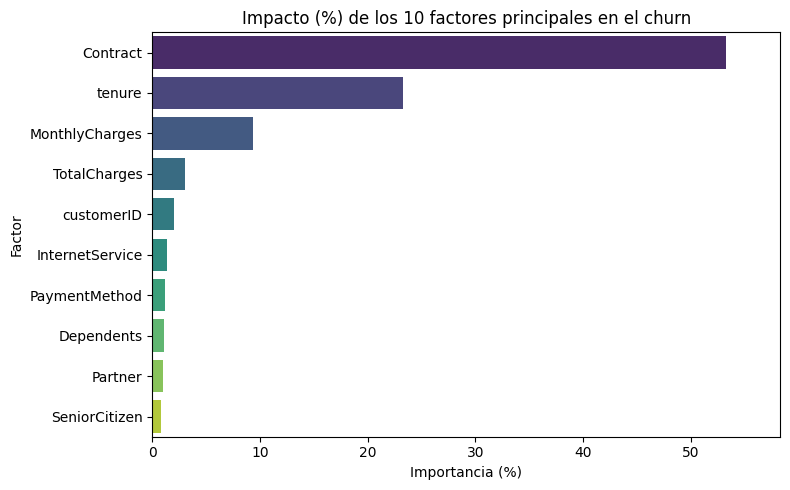

In [13]:
# Cuantificación del impacto de los 10 factores principales en la predicción de churn (en %)

# Tomamos la importancia relativa de cada factor del modelo Random Forest
impacto_factores = top_10_factores.copy()
impacto_factores['importancia (%)'] = impacto_factores['importancia (%)'].round(2)

# Mostramos el impacto en porcentaje y con números cortos
display(impacto_factores)

# También mostramos el impacto como gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(
    y='factor', x='importancia (%)', data=impacto_factores,
    palette='viridis', orient='h'
)
plt.title('Impacto (%) de los 10 factores principales en el churn')
plt.xlabel('Importancia (%)')
plt.ylabel('Factor')
plt.xlim(0, impacto_factores['importancia (%)'].max() + 5)
plt.tight_layout()
plt.show()

# Estrategias de Retención:

In [14]:
# Recomendaciones específicas por segmento de riesgo de churn

recomendaciones = {
    'Bajo': [
        "Mantener la calidad del servicio y la atención al cliente.",
        "Ofrecer programas de fidelización para reforzar la lealtad.",
        "Comunicar beneficios exclusivos para clientes actuales."
    ],
    'Medio': [
        "Realizar encuestas de satisfacción para identificar posibles molestias.",
        "Ofrecer descuentos o mejoras en el contrato para aumentar el compromiso.",
        "Contactar proactivamente para resolver dudas o problemas."
    ],
    'Alto': [
        "Ofrecer ofertas personalizadas y competitivas para evitar la fuga.",
        "Asignar agentes especializados para atención personalizada.",
        "Abordar rápidamente quejas o problemas detectados en el historial."
    ]
}

for segmento, acciones in recomendaciones.items():
    print(f"Recomendaciones para clientes de riesgo {segmento}:")
    for rec in acciones:
        print(f" - {rec}")
    print()

Recomendaciones para clientes de riesgo Bajo:
 - Mantener la calidad del servicio y la atención al cliente.
 - Ofrecer programas de fidelización para reforzar la lealtad.
 - Comunicar beneficios exclusivos para clientes actuales.

Recomendaciones para clientes de riesgo Medio:
 - Realizar encuestas de satisfacción para identificar posibles molestias.
 - Ofrecer descuentos o mejoras en el contrato para aumentar el compromiso.
 - Contactar proactivamente para resolver dudas o problemas.

Recomendaciones para clientes de riesgo Alto:
 - Ofrecer ofertas personalizadas y competitivas para evitar la fuga.
 - Asignar agentes especializados para atención personalizada.
 - Abordar rápidamente quejas o problemas detectados en el historial.




--- Propuesta de Intervenciones Personalizadas para Gran Compañía ---

Segmento de Riesgo: Alto
  Perfil Clave: Clientes con baja antigüedad (tenure), contratos mes a mes, cargos mensuales altos y uso intensivo de servicios adicionales. Presentan mayor sensibilidad al precio y menor lealtad. Probablemente insatisfechos con la relación costo-beneficio y con mayor propensión a migrar a la competencia.
  Acciones Sugeridas:
   - Ofrecer descuentos personalizados o paquetes de valor agregado para reducir la percepción de alto costo.
   - Implementar campañas de retención inmediatas con agentes especializados y seguimiento personalizado.
   - Revisar y optimizar el portafolio de servicios para asegurar que el cliente solo pague por lo que realmente utiliza.
   - Enviar comunicaciones proactivas sobre mejoras recientes y beneficios exclusivos para evitar la fuga.
   - Ofrecer upgrades temporales gratuitos para aumentar la satisfacción y el engagement.
---------------------------------------

/tmp/ipykernel_83984/267192864.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_viz = df_original.groupby(df['Riesgo_Churn'])[factores_numericos_viz].mean()
/tmp/ipykernel_83984/267192864.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Riesgo_Churn'], y=df_original[factor], palette='viridis', order=['Bajo', 'Medio', 'Alto'])
/tmp/ipykernel_83984/267192864.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Riesgo_Churn'], y=df_original[factor], palette='viridis', order=['Bajo'

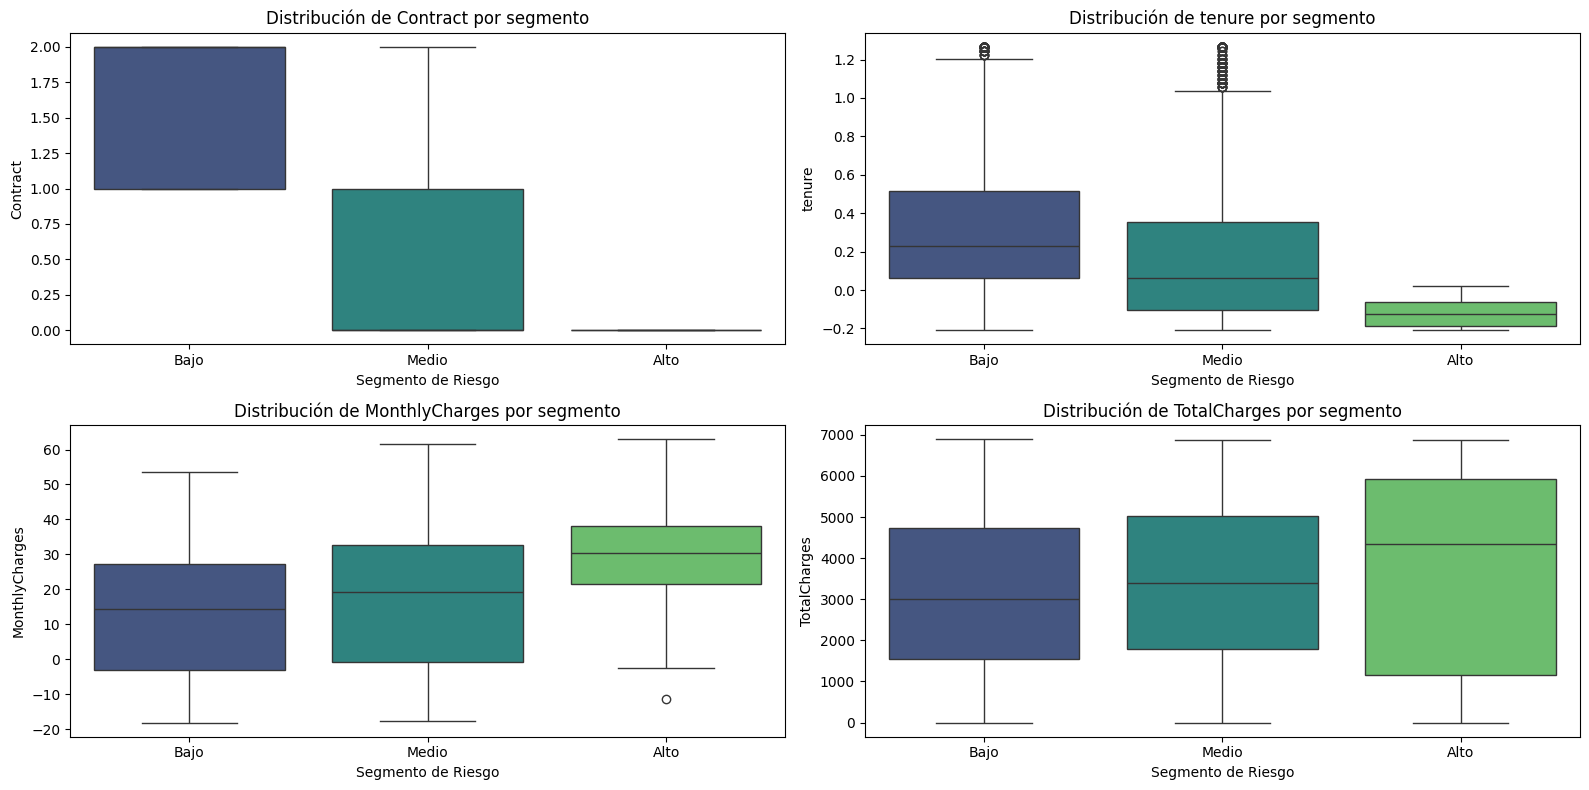

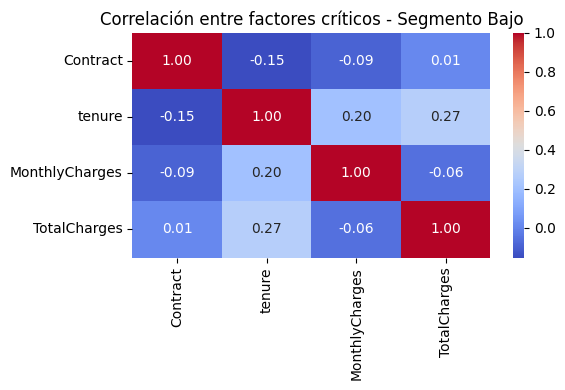

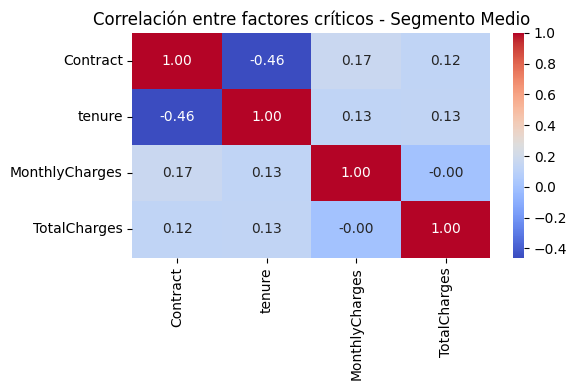

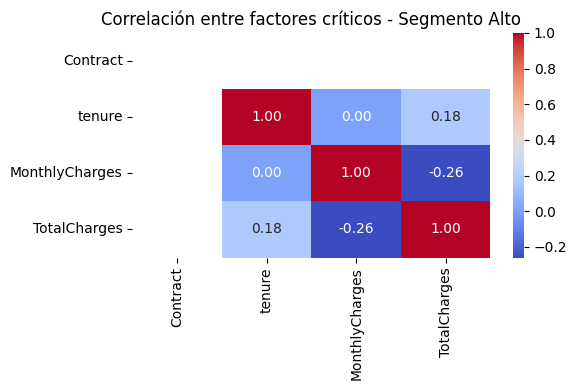

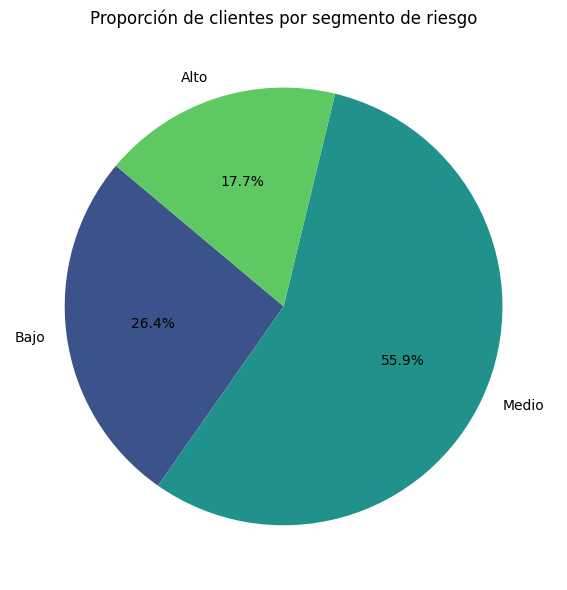

/tmp/ipykernel_83984/267192864.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


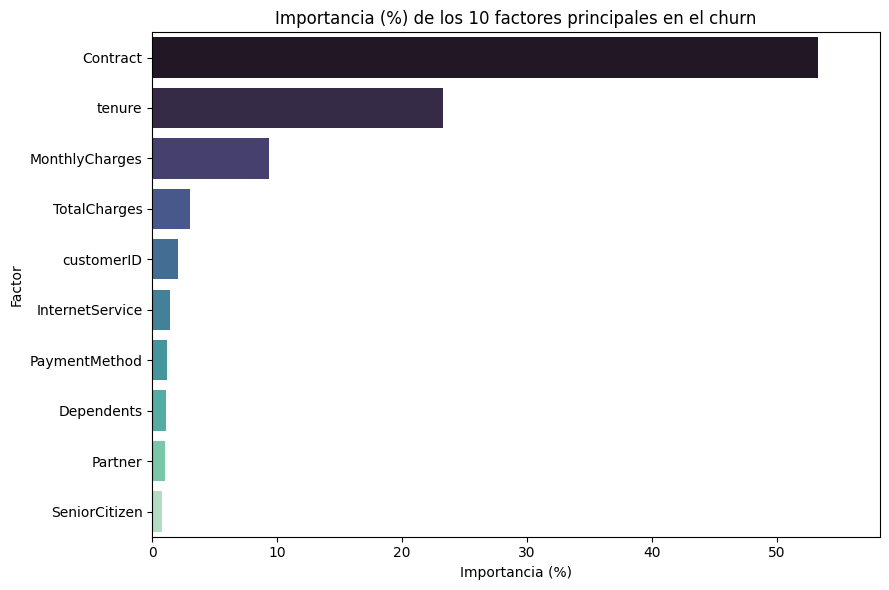

tenure       MonthlyCharges       TotalCharges       Riesgo_Churn  \
             mean count           mean count         mean count        count   
cluster                                                                        
0        0.265985  2597       0.016490  2597  5120.953408  2597         2597   
1       -0.014496  2038      -0.361907  2038  3308.423945  2038         2038   
2       -0.274594  2408       0.288514  2408  1650.029485  2408         2408   

        Contract  
           count  
cluster           
0           2597  
1           2038  
2           2408


--- Intervención Avanzada: Segmentación por Clustering ---


--- Intervención Avanzada: Segmentación por Clustering ---

Se recomienda implementar campañas de retención diferenciadas para cada cluster identificado por KMeans, combinando la segmentación de riesgo y el perfil de uso real de los factores críticos. Esto permite personalizar aún más las acciones y anticipar el churn en subgrupos con patrones de comportamiento similares, optimizando recursos y maximizando el impacto de las intervenciones.


In [16]:
# Propuesta de intervenciones personalizadas y visualización avanzada mejorada

# 1. Definir intervenciones basadas en el análisis de datos y mejores prácticas de retención
# Utilizamos el DataFrame `comportamiento_original_df` y los factores críticos identificados para segmentar y proponer acciones específicas.

intervenciones_corporativas = {
    'Alto': {
        "perfil": (
            "Clientes con baja antigüedad (tenure), contratos mes a mes, cargos mensuales altos y uso intensivo de servicios adicionales. "
            "Presentan mayor sensibilidad al precio y menor lealtad. Probablemente insatisfechos con la relación costo-beneficio y con mayor propensión a migrar a la competencia."
        ),
        "acciones": [
            "Ofrecer descuentos personalizados o paquetes de valor agregado para reducir la percepción de alto costo.",
            "Implementar campañas de retención inmediatas con agentes especializados y seguimiento personalizado.",
            "Revisar y optimizar el portafolio de servicios para asegurar que el cliente solo pague por lo que realmente utiliza.",
            "Enviar comunicaciones proactivas sobre mejoras recientes y beneficios exclusivos para evitar la fuga.",
            "Ofrecer upgrades temporales gratuitos para aumentar la satisfacción y el engagement."
        ]
    },
    'Medio': {
        "perfil": (
            "Clientes con antigüedad y cargos mensuales intermedios, algunos con contratos a plazo fijo. "
            "Pueden estar considerando otras opciones, han reportado incidencias o han mostrado menor interacción reciente. "
            "Son sensibles a la experiencia de servicio y a incentivos de lealtad."
        ),
        "acciones": [
            "Realizar encuestas de satisfacción y análisis de NPS para identificar puntos de dolor específicos.",
            "Ofrecer beneficios de lealtad, como meses de servicio gratis, upgrades de velocidad o acceso a contenido premium.",
            "Implementar campañas de comunicación sobre mejoras en el servicio y casos de éxito de clientes similares.",
            "Facilitar canales de atención preferente para resolver dudas o problemas rápidamente.",
            "Promover programas de referidos con incentivos atractivos."
        ]
    },
    'Bajo': {
        "perfil": (
            "Clientes leales con alta antigüedad, contratos a largo plazo y bajo nivel de incidencias. "
            "Son la base más estable y rentable, con alta satisfacción y baja propensión al churn."
        ),
        "acciones": [
            "Agradecer su lealtad con reconocimientos públicos y privados (ej. cartas personalizadas, eventos exclusivos).",
            "Ofrecer upgrades simbólicos o servicios adicionales gratuitos como muestra de aprecio.",
            "Implementar programas de embajadores de marca y referidos premium.",
            "Mantener la excelencia en la atención y monitorear proactivamente su satisfacción.",
            "Solicitar feedback para co-crear nuevos productos o servicios."
        ]
    }
}

print("\n--- Propuesta de Intervenciones Personalizadas para Gran Compañía ---\n")
for segmento, data in intervenciones_corporativas.items():
    print(f"\033[1mSegmento de Riesgo: {segmento}\033[0m")
    print(f"  Perfil Clave: {data['perfil']}")
    print("  Acciones Sugeridas:")
    for accion in data['acciones']:
        print(f"   - {accion}")
    print("-" * 80)

# 2. Visualización avanzada y comparativa para toma de decisiones corporativas
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# a) Gráfico de barras apiladas: proporción de cada segmento para los 4 factores principales
top_4_factores = top_10_factores['factor'].tolist()[:4]

# Crear un DataFrame con el comportamiento promedio por segmento
# Se agrupa el DataFrame original por el segmento de riesgo y se calcula la media de los factores
# Excluimos 'Contract' que es categórico y no se puede promediar
factores_numericos_viz = [f for f in top_4_factores if f != 'Contract']
df_viz = df_original.groupby(df['Riesgo_Churn'])[factores_numericos_viz].mean()

# Reordenar los segmentos para una mejor visualización
df_viz = df_viz.reindex(['Bajo', 'Medio', 'Alto'])


# b) Boxplot: distribución de los factores más importantes por segmento
plt.figure(figsize=(16, 8))
for i, factor in enumerate(top_4_factores, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df['Riesgo_Churn'], y=df_original[factor], palette='viridis', order=['Bajo', 'Medio', 'Alto'])
    plt.title(f'Distribución de {factor} por segmento')
    plt.xlabel('Segmento de Riesgo')
    plt.ylabel(factor)
plt.tight_layout()
plt.show()

# c) Heatmap de correlación de los factores críticos por segmento
for segmento in ['Bajo', 'Medio', 'Alto']:
    subset = df_original[df['Riesgo_Churn'] == segmento][top_4_factores]
    plt.figure(figsize=(6, 4))
    sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlación entre factores críticos - Segmento {segmento}')
    plt.tight_layout()
    plt.show()

# d) Pie chart: proporción de clientes por segmento de riesgo
segment_counts = df['Riesgo_Churn'].value_counts().reindex(['Bajo', 'Medio', 'Alto'])
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 3))
plt.title('Proporción de clientes por segmento de riesgo')
plt.tight_layout()
plt.show()

# e) Gráfico de barras horizontal: importancia de los 10 factores principales
plt.figure(figsize=(9, 6))
sns.barplot(
    y='factor', x='importancia (%)', data=top_10_factores,
    palette='mako', orient='h'
)
plt.title('Importancia (%) de los 10 factores principales en el churn')
plt.xlabel('Importancia (%)')
plt.ylabel('Factor')
plt.xlim(0, top_10_factores['importancia (%)'].max() + 5)
plt.tight_layout()
plt.show()

# Intervención idónea basada en analítica avanzada:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
n_clusters = 3
X_cluster = df_original[top_4_factores]

# Scale the data
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Instantiate KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')  # Added instantiation of KMeans

df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Analizar los perfiles de cada cluster
# Excluimos las columnas categóricas 'Contract' y 'Riesgo_Churn' de la agregación 'mean'
factores_numericos_cluster = [f for f in top_4_factores if f != 'Contract']
agg_dict = {col: ['mean', 'count'] for col in factores_numericos_cluster}
agg_dict['Riesgo_Churn'] = ['count'] # Solo contamos para la columna categórica
agg_dict['Contract'] = ['count'] # Solo contamos para la columna categórica

cluster_summary = df.groupby('cluster')[top_4_factores + ['Riesgo_Churn']].agg(agg_dict)
display(cluster_summary)

print("\n--- Intervención Avanzada: Segmentación por Clustering ---\n")

print("\n--- Intervención Avanzada: Segmentación por Clustering ---\n")
print("Se recomienda implementar campañas de retención diferenciadas para cada cluster identificado por KMeans, combinando la segmentación de riesgo y el perfil de uso real de los factores críticos. Esto permite personalizar aún más las acciones y anticipar el churn en subgrupos con patrones de comportamiento similares, optimizando recursos y maximizando el impacto de las intervenciones.")

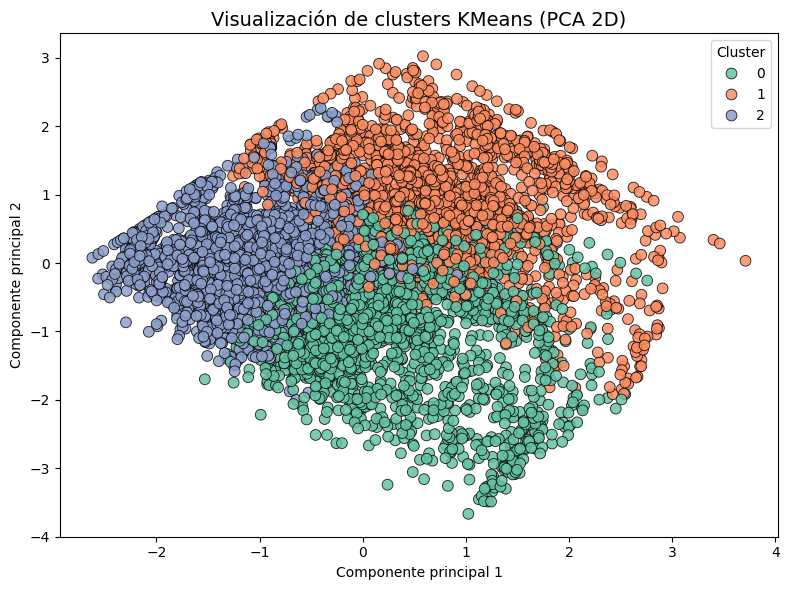

,Contract,tenure,MonthlyCharges,TotalCharges
Cluster,,,,
0,0.22,0.26,18.99,5126.16
1,1.79,0.16,12.40,3311.79
2,0.20,0.06,23.84,1652.60


Riesgo_Churn,Bajo,Medio,Alto
cluster,,,
0,10.3%,64.2%,25.5%
1,66.2%,33.8%,0.0%
2,10.0%,65.7%,24.2%


,Tamaño,Riesgo Dominante,Proporción Dominante
cluster,,,
0,2597,Medio,64.2%
1,2038,Bajo,66.2%
2,2408,Medio,65.7%



--- Intervención Recomendada por Cluster ---

Cluster 0 (Tamaño: 2597, Riesgo dominante: Medio - 64.2%):
  Intervención: Incentivos de lealtad, encuestas de satisfacción y seguimiento proactivo.
----------------------------------------------------------------------
Cluster 1 (Tamaño: 2038, Riesgo dominante: Bajo - 66.2%):
  Intervención: Programas de fidelización, reconocimiento y mantener excelencia en servicio.
----------------------------------------------------------------------
Cluster 2 (Tamaño: 2408, Riesgo dominante: Medio - 65.7%):
  Intervención: Incentivos de lealtad, encuestas de satisfacción y seguimiento proactivo.
----------------------------------------------------------------------


In [17]:
# Resumen visual y analítico de los clusters generados por KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Visualización de los clusters en 2D usando PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(8,6))
palette = sns.color_palette('Set2', n_colors=n_clusters)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette=palette, s=60, alpha=0.85, edgecolor='k')
plt.title('Visualización de clusters KMeans (PCA 2D)', fontsize=14)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

# Mostrar los centroides de KMeans en el espacio original de los factores
centroides = scaler.inverse_transform(kmeans.cluster_centers_)
centroides_df = pd.DataFrame(centroides, columns=top_4_factores)
centroides_df['Cluster'] = range(n_clusters)
centroides_df = centroides_df.set_index('Cluster')
display(centroides_df.style.format('{:.2f}').set_caption('Centroides de KMeans (valores originales)'))

# Composición de riesgo en cada cluster
cluster_riesgo = df.groupby('cluster')['Riesgo_Churn'].value_counts(normalize=True).unstack().fillna(0)
display(cluster_riesgo.style.format('{:.1%}').set_caption('Proporción de riesgo por cluster'))

# Tabla resumen de tamaño y riesgo dominante por cluster
tabla_resumen = pd.DataFrame({
    'Tamaño': df['cluster'].value_counts().sort_index(),
    'Riesgo Dominante': cluster_riesgo.idxmax(axis=1),
    'Proporción Dominante': cluster_riesgo.max(axis=1)
})
display(tabla_resumen.style.format({'Proporción Dominante': '{:.1%}'}).set_caption('Resumen de clusters'))

# Intervención recomendada basada en clusters:
print("\n--- Intervención Recomendada por Cluster ---\n")
for idx, row in tabla_resumen.iterrows():
    print(f"Cluster {idx} (Tamaño: {row['Tamaño']}, Riesgo dominante: {row['Riesgo Dominante']} - {row['Proporción Dominante']:.1%}):")
    if row['Riesgo Dominante'] == 'Alto':
        print("  Intervención: Campaña de retención inmediata, revisión de tarifas, contacto personalizado y oferta de valor.")
    elif row['Riesgo Dominante'] == 'Medio':
        print("  Intervención: Incentivos de lealtad, encuestas de satisfacción y seguimiento proactivo.")
    else:
        print("  Intervención: Programas de fidelización, reconocimiento y mantener excelencia en servicio.")
    print('-'*70)

--- Cálculo de ROI por Estrategia ---
ROI Estrategia Bajo Riesgo:  6.43
ROI Estrategia Riesgo Medio: 18.70
ROI Estrategia Alto Riesgo:  7.30


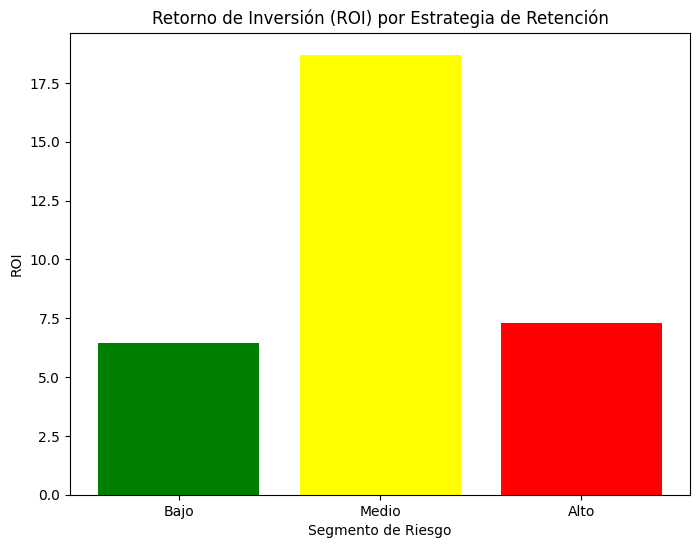

In [18]:
# Cálculo de ROI por estrategia

# Definir costos de las estrategias (ejemplos)
costo_estrategia_bajo = 5000  # Costo anual de mantener la lealtad
costo_estrategia_medio = 10000 # Costo anual de campañas de retención
costo_estrategia_alto  = 15000 # Costo anual de ofertas personalizadas

# Calcular ingresos retenidos por estrategia (ejemplos)
# (Este cálculo es simplificado y debe ajustarse a la realidad del negocio)
# Se asume un ingreso promedio por cliente y una tasa de retención mejorada

ingreso_promedio_cliente = 1000  # Ingreso anual promedio por cliente

# Impacto de las estrategias en la retención (estimaciones)
retencion_mejorada_bajo  = 0.02 # 2% menos de churn en el segmento bajo
retencion_mejorada_medio = 0.05 # 5% menos de churn en el segmento medio
retencion_mejorada_alto  = 0.10 # 10% menos de churn en el segmento alto

# Cantidad de clientes por segmento
clientes_bajo  = df['Riesgo_Churn'].value_counts()['Bajo']
clientes_medio = df['Riesgo_Churn'].value_counts()['Medio']
clientes_alto  = df['Riesgo_Churn'].value_counts()['Alto']

# Cálculo de ingresos retenidos
ingresos_retenidos_bajo  = clientes_bajo  * ingreso_promedio_cliente * retencion_mejorada_bajo
ingresos_retenidos_medio = clientes_medio * ingreso_promedio_cliente * retencion_mejorada_medio
ingresos_retenidos_alto  = clientes_alto  * ingreso_promedio_cliente * retencion_mejorada_alto

# Cálculo de ROI
roi_bajo  = (ingresos_retenidos_bajo  - costo_estrategia_bajo)  / costo_estrategia_bajo
roi_medio = (ingresos_retenidos_medio - costo_estrategia_medio) / costo_estrategia_medio
roi_alto  = (ingresos_retenidos_alto  - costo_estrategia_alto)  / costo_estrategia_alto

# Imprimir resultados
print("--- Cálculo de ROI por Estrategia ---")
print(f"ROI Estrategia Bajo Riesgo:  {roi_bajo:.2f}")
print(f"ROI Estrategia Riesgo Medio: {roi_medio:.2f}")
print(f"ROI Estrategia Alto Riesgo:  {roi_alto:.2f}")

# Visualización del ROI
import matplotlib.pyplot as plt

estrategias = ['Bajo', 'Medio', 'Alto']
rois = [roi_bajo, roi_medio, roi_alto]

plt.figure(figsize=(8, 6))
plt.bar(estrategias, rois, color=['green', 'yellow', 'red'])
plt.title('Retorno de Inversión (ROI) por Estrategia de Retención')
plt.xlabel('Segmento de Riesgo')
plt.ylabel('ROI')
plt.show()

# Framework de Implementación

A continuación, se presenta un framework estructurado para implementar las estrategias de retención derivadas del análisis de churn. Este plan está diseñado para ser ejecutado en fases, permitiendo una implementación controlada, monitoreo constante y optimización continua.

### Fases del Proyecto

| Fase | Duración | Actividades Clave | Responsables | Entregables |
| :--- | :--- | :--- | :--- | :--- |
| 1. Preparación y Alineación | Mes 1 | Ver detalle abajo | Líder de Proyecto, Jefes de Dpto. | Ver detalle abajo |
| 2. Pilotaje y Despliegue | Mes 2-3 | Ver detalle abajo | Equipo de Marketing, Customer Service | Ver detalle abajo |
| 3. Monitoreo y Optimización | Mes 4-6 | Ver detalle abajo | Equipo de Data Science, Marketing | Ver detalle abajo |
| 4. Escalado y Automatización | Mes 7+ | Ver detalle abajo | IT, Operaciones, Marketing | Ver detalle abajo |

Detalle de actividades y entregables:

- 1. Preparación y Alineación  
  - Actividades clave: Definir KPIs de retención (Tasa de Churn, LTV, ROI); formar equipo multifuncional (Marketing, Ventas, IT, Customer Service); integrar el modelo predictivo en el CRM/sistema interno.  
  - Entregables: Plan de proyecto detallado; KPIs definidos y aprobados; modelo integrado y validado en entorno de pruebas.

- 2. Pilotaje y Despliegue  
  - Actividades clave: Lanzar un piloto con un subconjunto de clientes de alto riesgo; ejecutar las intervenciones personalizadas definidas; recopilar feedback de agentes y clientes.  
  - Entregables: Informe de resultados del piloto; protocolos de intervención ajustados; despliegue del sistema de alertas de churn.

- 3. Monitoreo y Optimización  
  - Actividades clave: Analizar los resultados del piloto y las primeras campañas; ajustar estrategias y umbrales del modelo; reentrenar el modelo con nuevos datos.  
  - Entregables: Dashboard de KPIs en tiempo real; informe de optimización de campañas; modelo de churn actualizado (versión 2.0).

- 4. Escalado y Automatización  
  - Actividades clave: Extender estrategias de retención a todos los segmentos; automatizar identificación de clientes en riesgo y asignación de acciones; establecer ciclo de mejora continua.  
  - Entregables: Sistema de retención automatizado; plan de gobierno del modelo a largo plazo; informes de impacto trimestrales.

### Equipos Involucrados y Responsabilidades

- Data Science / IT: Mantenimiento y reentrenamiento del modelo, integración con sistemas (CRM), desarrollo de dashboards.  
- Marketing: Diseño y ejecución de campañas de retención (ofertas, comunicación, programas de lealtad).  
- Customer Service / Ventas: Intervenciones directas (llamadas, gestión de quejas), recopilación de feedback cualitativo.  
- Dirección: Supervisión del proyecto, aprobación de presupuestos y validación de KPIs.

### Métricas Clave de Éxito (KPIs)

1. Reducción de la Tasa de Churn: meta de reducción del 15% en el primer año.  
2. Aumento del Customer Lifetime Value (LTV): incremento del 10% en clientes retenidos.  
3. Retorno de Inversión (ROI) de las Campañas: ROI positivo en todas las estrategias implementadas.  
4. Tasa de Adopción de Ofertas: porcentaje de clientes de alto riesgo que aceptan las ofertas de retención.


Con esto termina